In [1]:
import scanpy as sc
import mudata as md
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from latentcor import gen_data, get_tps, latentcor

In [2]:
path_nSBM = '../data/mudata_nSBM_hierarchy_2.h5mu'
path_KEGG = '../data/mudata_KEGG_hierarchy_2.h5mu'
path_phrog = '../data/mudata_phrog_hierarchy_2.h5mu'

path_nSBM_final = '../data/mudata_nSBM_hierarchy_2_final.h5mu'
path_KEGG_final = '../data/mudata_KEGG_hierarchy_2_final.h5mu'
path_phrog_final = '../data/mudata_phrog_hierarchy_2_final.h5mu'

In [3]:
basepath_MGH66_prefix = '../data/MGH66_Abx3_'
basepath_MGH66_suffix = '_align2._CDS.tsv'
MHG66_variants = ['P1', 'P2', 'P2', 'P4']

In [4]:
data_nSBM = md.read_h5mu(path_nSBM_final)

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [26]:
data_gex = data_nSBM['SC_genes']
data_gex = data_gex[data_gex.obs['strains'] == 'GSM5456506_Kp_CDS']

In [27]:
sc.pp.highly_variable_genes(data_gex, n_top_genes=200)
data_gex = data_gex[:, data_gex.var['highly_variable']]

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:544: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': flavor}


In [40]:
data_gex.X.A[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [31]:
X_norm = sc.pp.normalize_total(data_gex, target_sum=1, inplace=False)['X']

In [38]:
X_norm.A[0]

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

In [33]:
np.unique(X_norm.A)

array([0.        , 0.008     , 0.00833333, 0.00934579, 0.00990099,
       0.01030928, 0.0106383 , 0.01219512, 0.01265823, 0.01315789,
       0.01333333, 0.01351351, 0.01388889, 0.01515152, 0.015625  ,
       0.01587302, 0.016     , 0.01612903, 0.01639344, 0.01666667,
       0.01694915, 0.01724138, 0.01754386, 0.01818182, 0.01851852,
       0.01869159, 0.01960784, 0.01980198, 0.02040816, 0.02061856,
       0.02083333, 0.0212766 , 0.02173913, 0.02272727, 0.02325581,
       0.02380952, 0.024     , 0.02439024, 0.025     , 0.025     ,
       0.02531646, 0.02564103, 0.02631579, 0.02666667, 0.02702703,
       0.02777778, 0.02803738, 0.02970297, 0.03030303, 0.03092783,
       0.03125   , 0.03174603, 0.03191489, 0.032     , 0.03225806,
       0.03278688, 0.03333334, 0.03389831, 0.03448276, 0.03508772,
       0.03571429, 0.03636364, 0.03658536, 0.03703704, 0.03738318,
       0.03797469, 0.03846154, 0.03921569, 0.03947368, 0.03960396,
       0.04      , 0.04      , 0.04054054, 0.04081633, 0.04123

In [42]:
tps = ['tru' for i in range(data_gex.shape[1])]

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\statsmodels\stats\correlation_tools.py:90: IterationLimitWarning: 
Maximum iteration reached.

  warnings.warn(iteration_limit_doc, IterationLimitWarning)


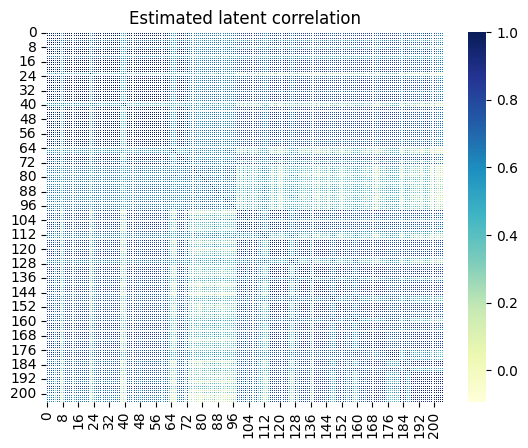

In [43]:
estimate = latentcor(X_norm.A, tps=tps, showplot=True)

In [45]:
estimate

{'R':           0         1         2         3         4         5         6    \
 0    1.000000  0.998908  0.998771  0.998780  0.720157  0.998772  0.998161   
 1    0.998908  1.000000  0.998795  0.998838  0.718147  0.998735  0.998232   
 2    0.998771  0.998795  1.000000  0.998422  0.712192  0.998564  0.998734   
 3    0.998780  0.998838  0.998422  1.000000  0.721914  0.998640  0.997646   
 4    0.720157  0.718147  0.712192  0.721914  1.000000  0.708367  0.697979   
 ..        ...       ...       ...       ...       ...       ...       ...   
 200  0.775938  0.772963  0.780436  0.767816  0.422903  0.777714  0.787287   
 201  0.643667  0.639699  0.650338  0.630625  0.301151  0.644897  0.659668   
 202  0.609758  0.605150  0.615729  0.596293  0.299621  0.610309  0.624042   
 203  0.683715  0.679970  0.688705  0.672690  0.345709  0.686448  0.696378   
 204  0.632142  0.628678  0.639021  0.620219  0.299392  0.634348  0.647934   
 
           7         8         9    ...       195       1

In [ ]:
simdata = gen_data(n = 10, tps = ["ter", "con", "con"])
print(simdata['X'][ : 6, : ])

In [44]:
get_tps(X_norm.A)

ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by eith

array(['tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'bin', 'tru', 'tru',
       'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru',
       'tru', 'ter', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru',
       'ter', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru',
       'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'ter', 'tru', 'tru',
       'ter', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru',
       'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'ter',
       'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru',
       'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru',
       'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru',
       'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru',
       'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru',
       'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru', 'tru',
       'tru', 'tru', 'tru', 'ter', 'tru', 'tru', 'tru', 'tru', 'tru',
       'tru', 'tru',

In [ ]:
ax = sns.heatmap(
    estimate['R'], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [14]:
cell0 = data_gex.X.A[:1000]

In [15]:
np.median(np.sum(cell0, axis=1))

6.0

In [16]:
np.mean(np.sum(cell0, axis=1))

8.829

In [19]:
np.sum(cell0, axis=1)

array([ 17.,   9.,  12.,   4.,   9.,   2.,   4.,  12.,  11.,   3.,   9.,
        12.,   8.,   2.,   2.,  16.,   3.,   9.,   3.,   6.,   7.,  10.,
        10.,   1.,   6.,   4.,   9.,   4.,   2.,   1.,   6.,   4.,   9.,
         3.,   6.,   9.,   3.,   4.,   2.,   7.,  13.,  13.,  14.,  13.,
        52.,  31.,   7.,   1.,  12.,   3.,   4.,   5.,   2.,   4.,   6.,
         6.,  11.,  37.,  10.,   4.,   5.,  13.,   1.,  12.,   1.,   4.,
        15.,  12.,   4.,  14.,   9.,   1.,  17.,  10.,   4.,  10.,  12.,
        21.,   4.,  32.,  17.,  12.,  10.,   5.,   4.,  11.,  12.,   4.,
        10.,  32.,  12.,   6.,   1.,   5.,  10.,   5.,   5.,   4.,   3.,
         2.,   4.,   4.,   5.,   4.,   4.,   7.,   6.,   6.,   6.,  20.,
         5.,   4.,   4.,   7.,   6.,   2.,   6.,   7.,   8.,   5.,  17.,
         8.,   9.,   4.,   1.,   7.,   9.,   9.,   8.,   3.,   4.,   4.,
         4.,  10.,   1.,   2.,  27.,  19.,   2.,   2.,   5.,   9.,  18.,
         8.,   3.,   2.,   1.,   1.,   5.,   3.,  1

In [20]:
data_gex.X.A.max()

84.0